# Naver Clova OCR

In [30]:
import requests
import uuid
import time
import json
from dotenv import load_dotenv
load_dotenv()

api_url = os.getenv("CLOVA_API_URL")
secret_key = os.getenv("CLOVA_OCR_SECRET_KEY")
image_file = "../documents/직원대출신청서_5개모음집_pages-to-jpg-0001.jpg"

request_json = {
    'images': [
        {
            'format': 'jpg',
            'name': 'demo'
        }
    ],
    'requestId': str(uuid.uuid4()),
    'version': 'V2',
    'timestamp': int(round(time.time() * 1000))
}

payload = {'message': json.dumps(request_json).encode('UTF-8')}
files = [
  ('file', open(image_file,'rb'))
]
headers = {
  'X-OCR-SECRET': secret_key
}

response = requests.request("POST", api_url, headers=headers, data = payload, files = files)

print(response.json())

result = response.json()

# 원래 코드는 print(response.text.encode('utf8'))이지만 수정
# for i in response.json()['images'][0]['fields']:
#     text = i['inferText']
#     print(text)

{'version': 'V2', 'requestId': 'b5656efa-6d11-4205-a6a9-decb83c84770', 'timestamp': 1745892843579, 'images': [{'uid': '667a53dd31534eef8b6e2b660ebc5f40', 'name': 'demo', 'inferResult': 'SUCCESS', 'message': 'SUCCESS', 'validationResult': {'result': 'NO_REQUESTED'}, 'convertedImageInfo': {'width': 1240, 'height': 1755, 'pageIndex': 0, 'longImage': False}, 'fields': [{'valueType': 'ALL', 'boundingPoly': {'vertices': [{'x': 760.0, 'y': 149.0}, {'x': 815.0, 'y': 149.0}, {'x': 815.0, 'y': 171.0}, {'x': 760.0, 'y': 171.0}]}, 'inferText': '담당', 'inferConfidence': 0.9599, 'type': 'NORMAL', 'lineBreak': True}, {'valueType': 'ALL', 'boundingPoly': {'vertices': [{'x': 282.0, 'y': 172.0}, {'x': 368.0, 'y': 172.0}, {'x': 368.0, 'y': 223.0}, {'x': 282.0, 'y': 223.0}]}, 'inferText': '직원', 'inferConfidence': 0.9999, 'type': 'NORMAL', 'lineBreak': False}, {'valueType': 'ALL', 'boundingPoly': {'vertices': [{'x': 382.0, 'y': 172.0}, {'x': 589.0, 'y': 172.0}, {'x': 589.0, 'y': 224.0}, {'x': 382.0, 'y': 22

In [26]:
response.json()

{'version': 'V2',
 'requestId': '56479f3b-041e-4878-a6f1-dbc9e5b3bbfc',
 'timestamp': 1745892449580,
 'images': [{'uid': '7f69a340fe36482daf26c762e2b5d7ec',
   'name': 'demo',
   'inferResult': 'SUCCESS',
   'message': 'SUCCESS',
   'validationResult': {'result': 'NO_REQUESTED'},
   'convertedImageInfo': {'width': 1240,
    'height': 1755,
    'pageIndex': 0,
    'longImage': False},
   'fields': [{'valueType': 'ALL',
     'boundingPoly': {'vertices': [{'x': 760.0, 'y': 149.0},
       {'x': 815.0, 'y': 149.0},
       {'x': 815.0, 'y': 171.0},
       {'x': 760.0, 'y': 171.0}]},
     'inferText': '담당',
     'inferConfidence': 0.9599,
     'type': 'NORMAL',
     'lineBreak': True},
    {'valueType': 'ALL',
     'boundingPoly': {'vertices': [{'x': 282.0, 'y': 172.0},
       {'x': 368.0, 'y': 172.0},
       {'x': 368.0, 'y': 223.0},
       {'x': 282.0, 'y': 223.0}]},
     'inferText': '직원',
     'inferConfidence': 0.9999,
     'type': 'NORMAL',
     'lineBreak': False},
    {'valueType': 'A

## 인식된 TEXT 영역 확인

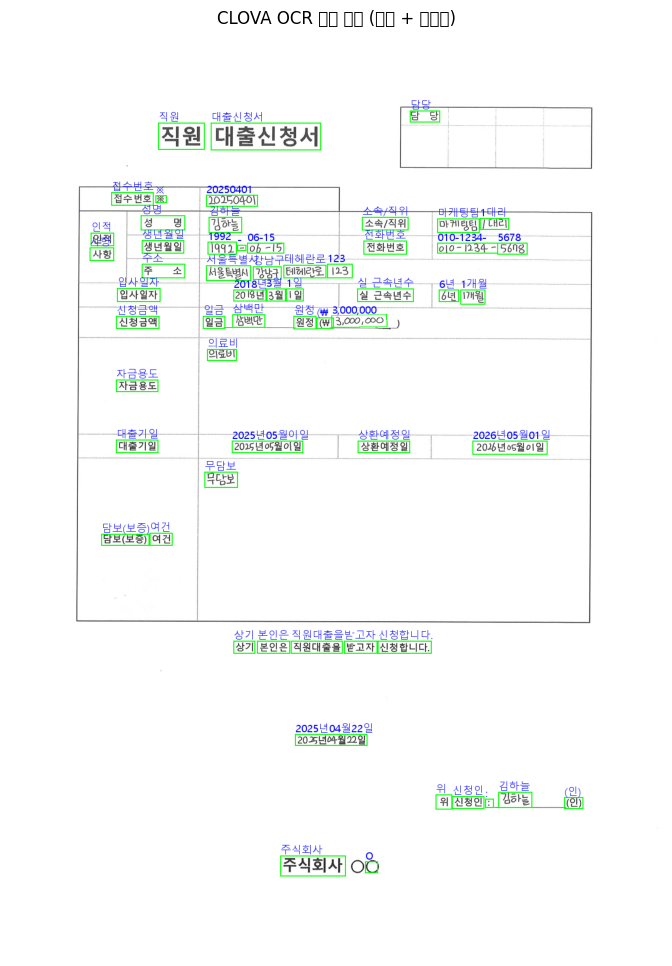

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# === 1. 원본 이미지 불러오기
image_path = "../documents/직원대출신청서_5개모음집_pages-to-jpg-0001.jpg"

def load_image_with_pil(image_path):
    pil_image = Image.open(image_path).convert("RGB")
    return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

img_cv = load_image_with_pil(image_path)

# === 3. 폰트 설정 (한글 깨짐 방지)
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows 기본 한글 폰트
font = ImageFont.truetype(font_path, 20)

# === 4. PIL로 변환 (한글 텍스트를 위해)
image_pil = Image.fromarray(img_cv)
draw = ImageDraw.Draw(image_pil)

# === 5. OCR 결과 기반 박스 + 텍스트 그리기
for field in result['images'][0]['fields']:
    vertices = field['boundingPoly']['vertices']
    text = field['inferText']
    confidence = field['inferConfidence']

    # 꼭짓점 추출
    pts = [(int(v['x']), int(v['y'])) for v in vertices]

    # 박스 그리기 (초록색)
    draw.line(pts + [pts[0]], fill=(0, 255, 0), width=2)

    # 텍스트 그리기 (파란색)
    x, y = pts[0]
    draw.text((x, y - 25), f"{text}", font=font, fill=(0, 0, 255))

# === 6. 최종 출력
plt.figure(figsize=(12, 12))
plt.imshow(np.array(image_pil))
plt.axis('off')
plt.title("CLOVA OCR")
plt.show()
